IMPORTING THE REQUIRED CSV FILE

In [1]:
from __future__ import absolute_import, division, print_function

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.7.0


IMPORTING REQUIRED LIBRARIES

In [2]:
from google.colab import files
uploaded = files.upload()

Saving auto_mpg.csv to auto_mpg.csv


In [3]:
Null_values=('?')
data=pd.read_csv("auto_mpg.csv",na_values=Null_values)

CALLING 5 ROWS OF THE DATASET

In [4]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


GETTING COMPLETE INFORMATION OF THE DATA(BEFORE ASSIGNING NULL VALUES)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [6]:
data['horsepower'].isna().sum()


6

DESCRIPTIVE ANALYSIS OF THE DATA

In [7]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
data.shape

(398, 9)

In [9]:
data.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

CODE FOR GETTING THE MEAN OF HORSEPOWER COLUMN IN DATA

In [10]:
data.horsepower.mean()

104.46938775510205

ASSIGNING NULL VALUES OF HORSEPOWER WITH MEAN OF THE HORSEPOWER COLUMN

In [11]:
data.horsepower.fillna(data.horsepower.mean(),inplace=True)

In [12]:
data.head(40)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.000000,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.000000,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.000000,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.000000,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.000000,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.000000,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.000000,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.000000,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.000000,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.000000,3850,8.5,70,1,amc ambassador dpl


GETTING COMPLETE INFORMATION OF THE DATA
AFTER ASSIGNING THE NULL VALUES

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [14]:
data.horsepower.mean()

104.46938775510206

ASSIGNING COUNTRY NAMES BASED ON THE ORIGIN OF THE DATA

In [15]:
data['country_name']=data.origin.replace([1,2,3],['USA','EUROPE','JAPAN'])
data['country_name']=data.origin.replace([1,2,3],['USA','EUROPE','JAPAN'])

In [16]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,country_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,USA
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,USA
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,USA
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,USA
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,USA


In [17]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


PLOTTING ATTRIBUTES OF THE DATA WITH RESPECT TO THE ATTRIBUTE MPG

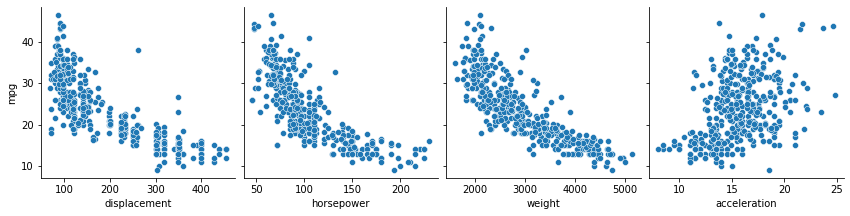

In [18]:
sns.pairplot(data,x_vars=['displacement','horsepower','weight','acceleration'],y_vars='mpg',height=3,aspect=1)


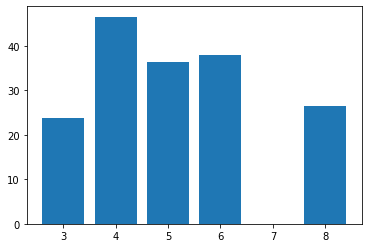

In [19]:
plt.bar(x=data['cylinders'],
        height=data['mpg'])
     
plt.show()

<BarContainer object of 398 artists>

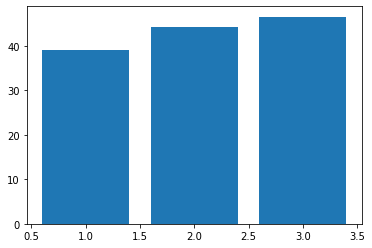

In [20]:
plt.bar(x=data['origin'],
        height=data['mpg'])

In [21]:
data["car name"].value_counts()

ford pinto             6
amc matador            5
toyota corolla         5
ford maverick          5
amc hornet             4
                      ..
ford fairmont          1
datsun 810 maxima      1
plymouth grand fury    1
vokswagen rabbit       1
datsun b210            1
Name: car name, Length: 305, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


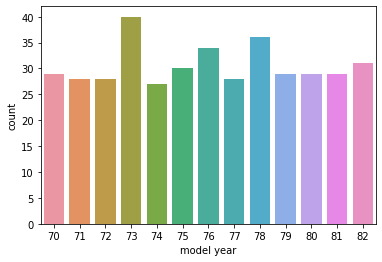

In [22]:
sns.countplot(data["model year"])

In [23]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


In [24]:
data=data.drop(['origin'],axis=1)

Text(0.5, 1.0, 'Heatmap displaying the relationship between the variabls of the data')

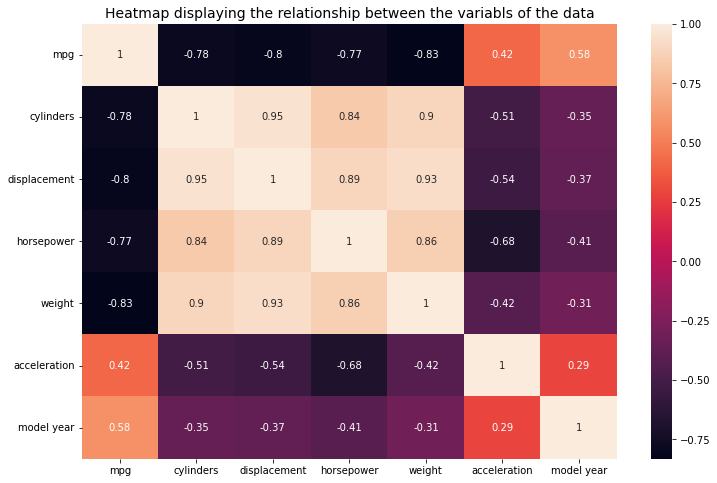

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.title('Heatmap displaying the relationship between the variabls of the data',fontsize=14)

FITTING A LINEAR REGRESSION MODEL

ASSIGNING DATA TO THE NEW VARIABLE BY REMOVING OBJECTIVE COLUMNS

In [26]:
newdata=data.drop(['car name','country_name'],axis=1)

In [27]:
X=newdata.drop('mpg',axis=1)
Y=newdata.mpg

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
#os.chdir('.\\Desktop\\EDUCATE\\DATA CSV')
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [31]:
X_scaled=preprocessing.scale(X)
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,train_size=0.7,test_size=0.3,random_state=0)

In [32]:
model=LinearRegression()
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [33]:
model.fit(X_train,Y_train)

LinearRegression()

IMPORTING REQUIRED LIBRARIES TO FIT LINEAR REGRESSION

In [35]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [36]:
import statsmodels.api as sm
m=sm.OLS(Y_train,X_train)
m=m.fit()
print(m.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.061    
Dependent Variable:     mpg              AIC:                         2558.3181
Date:                   2021-12-27 13:30 BIC:                         2580.0838
No. Observations:       278              Log-Likelihood:              -1273.2  
Df Model:               6                F-statistic:                 3.999    
Df Residuals:           272              Prob (F-statistic):          0.000745 
R-squared (uncentered): 0.081            Scale:                       568.70   
----------------------------------------------------------------------------------
                    Coef.     Std.Err.       t       P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
cylinders           3.0204      4.6251     0.6530    0.5143     -6.0852    12.1260
displacement       -2.6857      6.3718    -0.4215   

In [37]:
linear_prediction=model.predict(X_test)
print("train score:{}\n".format(model.score(X_train,Y_train)))
print("test score:{}\n".format(model.score(X_test,Y_test)))
print("overall model accuracy:{}\n".format(r2_score(Y_test,linear_prediction)))
print("mean squared error:{}\n".format(mean_squared_error(Y_test,linear_prediction)))

train score:0.8064770604200187

test score:0.8066396544567368

overall model accuracy:0.8066396544567368

mean squared error:12.356090107920608



In [38]:
import math
rmse=math.sqrt((mean_squared_error(Y_test,linear_prediction)))
print("Root mean square error:",rmse)

Root mean square error: 3.5151230572940984


In [39]:
model.coef_

array([-0.25574406,  0.86526188, -0.29663133, -5.68106499,  0.44715614,
        2.77364436])

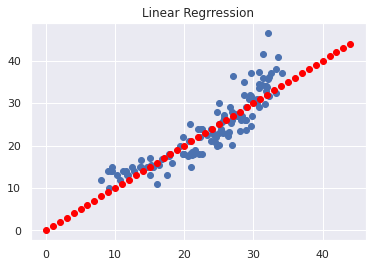

In [40]:
fig,ax=plt.subplots()
ax.scatter(linear_prediction,Y_test)
plt.scatter(np.arange(0,45),np.arange(0,45),color='red')
plt.title("Linear Regrression")
plt.show()

In [41]:
a=pd.DataFrame({'Actual':Y_test,'predict':linear_prediction})
a

,Actual,predict
65,14.0,12.719467
132,25.0,24.986308
74,13.0,11.792174
78,21.0,20.695277
37,18.0,17.747687
...,...,...
236,25.5,25.505093
352,29.9,31.661360
92,13.0,11.859878
221,17.5,17.746111


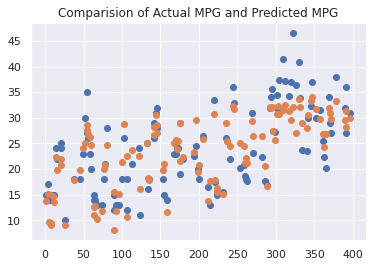

In [43]:
plt.title('Comparision of Actual MPG and Predicted MPG')
plt.scatter(a.index,a.Actual.values)
plt.scatter(a.index, a.predict.values)
plt.show()